In [50]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhc_risk_kit as erk
import pandas as pd
import numpy as np
ind_return = erk.get_ind_returns()
tmi_return = erk.get_total_market_index_returns()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
risky_r = ind_return["2000":][["Steel","Fin","Beer"]]
safe_r = pd.DataFrame().reindex_like(risky_r)
safe_r[:] = 0.03/12
start = 1000
floor = 0.80

In [43]:
dates = risky_r.index
n_steps = len(dates)
account_value= start
floor_value = start*floor
m=3
account_history=pd.DataFrame().reindex_like(risky_r)
cushion_history=pd.DataFrame().reindex_like(risky_r)
risky_w_history=pd.DataFrame().reindex_like(risky_r)
risky_r.shape

(228, 3)

In [46]:
for step in range(n_steps):
    cushion = (account_value - floor_value)/account_value
    risky_w = m*cushion
    risky_w = np.minimum(risky_w,1)
    risky_w = np.maximum(risky_w,0)
    safe_w = 1 - risky_w
    risky_alloc = account_value*risky_w
    safe_alloc = account_value*safe_w
    account_value = risky_alloc*(1+risky_r.iloc[step]) + safe_alloc*(1+safe_r.iloc[step])
    cushion_history.iloc[step] = cushion
    risk_w_history.iloc[step] = risky_w
    account_history.iloc[step] = account_value
    risky_wealth = start*(1+risky_r).cumprod()

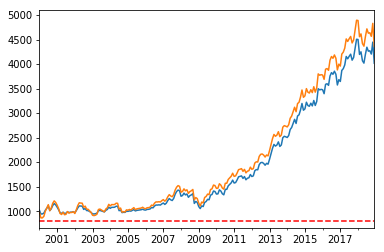

In [47]:
ind = "Beer"
ax = account_history[ind].plot()
risky_wealth[ind].plot()
ax.axhline(y=floor_value, color='r', linestyle='--')

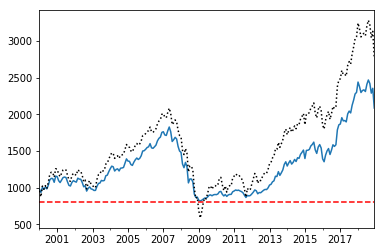

In [48]:
ind = "Fin"
ax = account_history[ind].plot()
risky_wealth[ind].plot(style="k:")
ax.axhline(y=floor_value, color='r', linestyle='--')

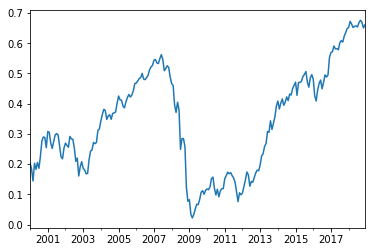

In [49]:
cushion_history["Fin"].plot()


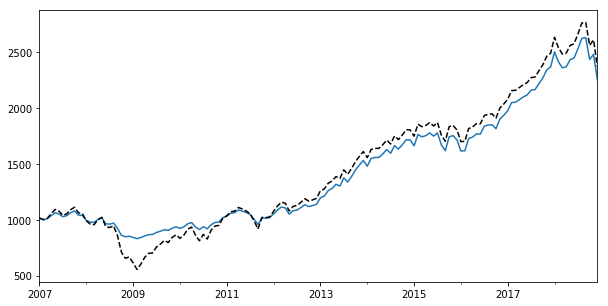

In [52]:
btr = erk.run_cppi(tmi_return["2007":])
ax = btr["Wealth"].plot(legend=False, figsize=(10, 5))
btr["Risky Wealth"].plot(ax = ax, style="k--", legend=False)

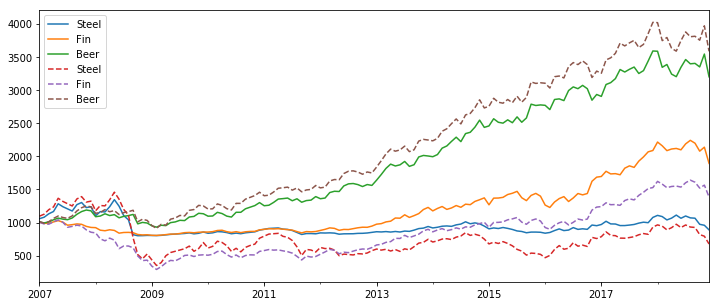

In [53]:
btr = erk.run_cppi(ind_return["2007":][["Steel", "Fin", "Beer"]])
ax = btr["Wealth"].plot(figsize=(12,5))
btr["Risky Wealth"].plot(ax=ax, style="--")

In [58]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Sharpe Ratio,Max Drawdown
Steel,-0.014490,0.126906,-1.554266,11.668243,0.068652,-0.341351,-0.404132
Fin,0.054690,0.109579,-0.254976,5.589082,0.047503,0.219159,-0.216868
Beer,0.101518,0.114363,-0.743585,4.527865,0.051074,0.608531,-0.217280


In [59]:
erk.summary_stats(btr["Wealth"].pct_change().dropna())[["Annualized Return", "Annualized Vol", "Sharpe Ratio", "Max Drawdown"]]

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
Steel,-0.014490,0.126906,-0.341351,-0.404132
Fin,0.054690,0.109579,0.219159,-0.216868
Beer,0.101518,0.114363,0.608531,-0.217280


In [60]:
erk.summary_stats(btr["Risky Wealth"].pct_change().dropna())[["Annualized Return", "Annualized Vol", "Sharpe Ratio", "Max Drawdown"]]

,Annualized Return,Annualized Vol,Sharpe Ratio,Max Drawdown
Steel,-0.039660,0.306407,-0.221642,-0.758017
Fin,0.027364,0.212204,-0.012370,-0.718465
Beer,0.111554,0.127971,0.620132,-0.271368
